In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import sep as sep
import seaborn as sns

In [74]:
exp_path = 'Y:\Lior&Einav\Experiments\experiment11_140720'

In [75]:
T = pd.read_csv(exp_path+sep+'trophallaxis_table_enriched_temp.csv')
#T = pd.read_csv(r'Y:\Lior&Einav\data_cleaning meeting 081221\trophallaxis_table_enriched_temp.csv')
T.head()

,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got_red,ant1_got_yellow,ant2_got_red,ant2_got_yellow,ant1_crop_before_red,ant1_crop_before_yellow,ant2_crop_before_red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y
0,1.0,29.0,392,76.0,116.0,159.0,72.0,115.0,0.000000,120736.955469,0.000000,-171691.306396,0.000000,0.000000,0.0,210171.501709,2908.261422,2908.261422,3155.648010,3155.648010
1,1.0,35.0,82,169.0,195.0,197.0,151.0,153.0,26491.044434,877.170142,7399.652716,1818.816299,0.000000,0.000000,0.0,0.000000,768.371633,768.371633,NaN,NaN
2,1.0,44.0,169,529.0,240.0,243.0,196.0,199.0,2067.447260,3577.479721,1751.868439,1638.830322,7399.652716,1818.816299,0.0,0.000000,1277.737512,1277.737512,NaN,NaN
3,1.0,48.0,76,148.0,276.0,281.0,232.0,237.0,32834.940625,34183.488281,0.000000,39448.017188,336749.371875,38480.195312,0.0,321006.945312,2554.004447,2554.004447,2301.130591,2301.130591
4,1.0,49.0,180,148.0,288.0,439.0,244.0,395.0,317.744293,109959.843750,0.000000,-356157.318945,0.000000,0.000000,0.0,360454.962500,NaN,NaN,NaN,NaN


In [76]:
conversion_factors = pd.read_csv(exp_path +sep+ 'conversion_factors_by_weight_and_feeding_sum.csv')
conversion_factors

,red,yellow
0,68482.697584,56792.534613


In [78]:
T.loc[:,'ant1_got_red_ul'] = T.ant1_got_red/conversion_factors.red[0]
T.loc[:,'ant1_got_yellow_ul'] = T.ant1_got_yellow/conversion_factors.yellow[0]
T.loc[:,'ant2_got_red_ul'] = T.ant2_got_red/conversion_factors.red[0]
T.loc[:,'ant2_got_yellow_ul'] = T.ant2_got_yellow/conversion_factors.yellow[0]
T.head()

,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got_red,ant1_got_yellow,...,ant2_crop_before_red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
0,1.0,29.0,392,76.0,116.0,159.0,72.0,115.0,0.000000,120736.955469,...,0.0,210171.501709,2908.261422,2908.261422,3155.648010,3155.648010,0.000000,2.125930,0.000000,-3.023132
1,1.0,35.0,82,169.0,195.0,197.0,151.0,153.0,26491.044434,877.170142,...,0.0,0.000000,768.371633,768.371633,NaN,NaN,0.386828,0.015445,0.108051,0.032026
2,1.0,44.0,169,529.0,240.0,243.0,196.0,199.0,2067.447260,3577.479721,...,0.0,0.000000,1277.737512,1277.737512,NaN,NaN,0.030189,0.062992,0.025581,0.028856
3,1.0,48.0,76,148.0,276.0,281.0,232.0,237.0,32834.940625,34183.488281,...,0.0,321006.945312,2554.004447,2554.004447,2301.130591,2301.130591,0.479463,0.601901,0.000000,0.694599
4,1.0,49.0,180,148.0,288.0,439.0,244.0,395.0,317.744293,109959.843750,...,0.0,360454.962500,NaN,NaN,NaN,NaN,0.004640,1.936167,0.000000,-6.271200


In [79]:
M = 0.1 # minimum transfer volume

In [80]:
def classify_ant_by_own_measurement(got_red, got_yellow):
    giver1 = (got_red < M) & (got_yellow <= -M)
    giver2 = (got_red <= -M) & (got_yellow < M)
    giver = giver1 | giver2
    
    receiver1 = (got_red > -M) & (got_yellow >= M)
    receiver2 = (got_red >= M) & (got_yellow > -M)
    receiver = receiver1 | receiver2
    
    vol0 = (abs(got_red) < M) & (abs(got_yellow) < M)
    
    inconsistent1 = (got_red >= M) & (got_yellow <= -M)
    inconsistent2 = (got_red <= -M) & (got_yellow >= M)
    inconsistent = inconsistent1 | inconsistent2
    
    return giver, receiver, vol0, inconsistent

In [81]:
ant1_g, ant1_r, ant1_0, ant1_X = classify_ant_by_own_measurement(T.ant1_got_red_ul, T.ant1_got_yellow_ul)

In [82]:
sum(ant1_g)+sum(ant1_r)+sum(ant1_0)+sum(ant1_X)

1202

In [83]:
T[ant1_g+ant1_r+ant1_0+ant1_X == False]

C:\Users\liorba\Anaconda3\envs\Experimenting\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got_red,ant1_got_yellow,...,ant2_crop_before_red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
1197,10.0,205.0,72,552.0,811.0,836.0,9776.0,9801.0,NaN,NaN,...,431333.00000,528922.437500,NaN,NaN,NaN,NaN,NaN,NaN,-2.437595,-3.166111
1203,10.0,229.0,329,392.0,889.0,891.0,9854.0,9856.0,NaN,NaN,...,257246.65625,274195.445312,2966.534251,2966.534251,2772.256063,2772.256063,NaN,NaN,NaN,NaN


In [84]:
ant2_g, ant2_r, ant2_0, ant2_X = classify_ant_by_own_measurement(T.ant2_got_red_ul, T.ant2_got_yellow_ul)

In [85]:
sum(ant2_g)+sum(ant2_r)+sum(ant2_0)+sum(ant2_X)

1188

In [86]:
T[ant2_g+ant2_r+ant2_0+ant2_X == False]

,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got_red,ant1_got_yellow,...,ant2_crop_before_red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
24,1.0,171.0,392,-1.0,905.0,970.0,861.0,926.0,-37308.300696,-217430.536719,...,NaN,NaN,950.939496,950.939496,NaN,NaN,-0.544784,-3.828506,NaN,NaN
329,5.0,36.0,150,-1.0,72.0,119.0,4032.0,4079.0,-105350.543750,-551.279358,...,NaN,NaN,1346.672151,1346.672151,NaN,NaN,-1.538353,-0.009707,NaN,NaN
402,5.0,218.0,429,-1.0,463.0,463.0,4423.0,4423.0,-63248.087500,22131.884375,...,NaN,NaN,1026.465692,1026.465692,NaN,NaN,-0.923563,0.389697,NaN,NaN
472,5.0,428.0,289,-1.0,860.0,883.0,4820.0,4843.0,0.000000,-5019.093750,...,NaN,NaN,679.489801,679.489801,NaN,NaN,0.000000,-0.088376,NaN,NaN
487,5.0,405.0,23,-1.0,962.0,970.0,4922.0,4930.0,-8194.227539,-83393.168549,...,NaN,NaN,1295.069258,1295.069258,NaN,NaN,-0.119654,-1.468383,NaN,NaN
502,6.0,14.0,418,-1.0,34.0,38.0,4995.0,4999.0,-32554.378326,-9151.456439,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.475366,-0.161138,NaN,NaN
593,6.0,162.0,1,-1.0,644.0,649.0,5605.0,5610.0,13008.393359,-8691.025000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.189952,-0.153031,NaN,NaN
635,6.0,212.0,552,-1.0,874.0,876.0,5835.0,5837.0,-81586.084793,-1038.453125,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.191339,-0.018285,NaN,NaN
718,7.0,131.0,289,-1.0,554.0,654.0,6516.0,6616.0,-22029.210030,-197554.375000,...,NaN,NaN,1575.624551,1575.624551,NaN,NaN,-0.321676,-3.478527,NaN,NaN
791,8.0,231.0,445,-1.0,171.0,227.0,7134.0,7190.0,-85975.027627,-100037.534464,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.255427,-1.761456,NaN,NaN


## Within-ant consistency

In [87]:
ant1_inconsistency = np.mean(ant1_X)
ant2_inconsistency = np.mean(ant2_X)
print(f'ant1 inconsistency: {ant1_inconsistency}')
print(f'ant2 inconsistency: {ant2_inconsistency}')


ant1 inconsistency: 0.11710963455149502
ant2 inconsistency: 0.12541528239202657


In [88]:
mean_within_ant_inconsistency = np.mean([ant1_inconsistency,ant2_inconsistency])
print(f'mean within-ant inconsistency: {mean_within_ant_inconsistency}')

mean within-ant inconsistency: 0.12126245847176079


In [89]:
both_ants_consistent_by_own_measurements = (ant1_X==False) & (ant2_X==False)
mean_both_ants_consistent_by_own_measurements = np.mean(both_ants_consistent_by_own_measurements)
print(f'both ants consistent by own measurements: {mean_both_ants_consistent_by_own_measurements}')

both ants consistent by own measurements: 0.7749169435215947


In [90]:
both_ants_inconsistent_by_own_measurements = (ant1_X) & (ant2_X)
mean_both_ants_inconsistent_by_own_measurements = np.mean(both_ants_inconsistent_by_own_measurements)
print(f'both ants inconsistent by own measurements: {mean_both_ants_inconsistent_by_own_measurements}')

both ants inconsistent by own measurements: 0.01744186046511628


## Between-ant consistency

In [91]:
ant1_to_ant2_a = ant1_g & (ant2_r | ant2_0)
ant1_to_ant2_b = ant2_r & (ant1_g | ant1_0)
ant1_to_ant2 = ant1_to_ant2_a | ant1_to_ant2_b

ant2_to_ant1_a = ant2_g & (ant1_r | ant1_0)
ant2_to_ant1_b = ant1_r & (ant2_g | ant2_0)
ant2_to_ant1 = ant2_to_ant1_a | ant2_to_ant1_b

vol0 = ant1_0 & ant2_0

inconsistent = (ant1_g & ant2_g) | (ant1_r & ant2_r)

one_inconsistent_ant = (ant1_X | ant2_X) & ~(ant1_X & ant2_X)

both_ants_inconsistent = (ant1_X & ant2_X)

In [92]:
sum(ant1_to_ant2)+sum(ant2_to_ant1)+sum(vol0)+sum(inconsistent)+sum(one_inconsistent_ant)+ sum(both_ants_inconsistent)

1190

In [93]:
T[ant1_to_ant2+ant2_to_ant1+vol0+inconsistent+one_inconsistent_ant+both_ants_inconsistent == False]

,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got_red,ant1_got_yellow,...,ant2_crop_before_red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
24,1.0,171.0,392,-1.0,905.0,970.0,861.0,926.0,-37308.300696,-217430.536719,...,NaN,NaN,950.939496,950.939496,NaN,NaN,-0.544784,-3.828506,NaN,NaN
329,5.0,36.0,150,-1.0,72.0,119.0,4032.0,4079.0,-105350.543750,-551.279358,...,NaN,NaN,1346.672151,1346.672151,NaN,NaN,-1.538353,-0.009707,NaN,NaN
472,5.0,428.0,289,-1.0,860.0,883.0,4820.0,4843.0,0.000000,-5019.093750,...,NaN,NaN,679.489801,679.489801,NaN,NaN,0.000000,-0.088376,NaN,NaN
487,5.0,405.0,23,-1.0,962.0,970.0,4922.0,4930.0,-8194.227539,-83393.168549,...,NaN,NaN,1295.069258,1295.069258,NaN,NaN,-0.119654,-1.468383,NaN,NaN
502,6.0,14.0,418,-1.0,34.0,38.0,4995.0,4999.0,-32554.378326,-9151.456439,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.475366,-0.161138,NaN,NaN
635,6.0,212.0,552,-1.0,874.0,876.0,5835.0,5837.0,-81586.084793,-1038.453125,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.191339,-0.018285,NaN,NaN
718,7.0,131.0,289,-1.0,554.0,654.0,6516.0,6616.0,-22029.210030,-197554.375000,...,NaN,NaN,1575.624551,1575.624551,NaN,NaN,-0.321676,-3.478527,NaN,NaN
791,8.0,231.0,445,-1.0,171.0,227.0,7134.0,7190.0,-85975.027627,-100037.534464,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.255427,-1.761456,NaN,NaN
792,8.0,232.0,552,-1.0,171.0,206.0,7134.0,7169.0,60145.544388,35999.885204,...,NaN,NaN,1468.993192,1468.993192,NaN,NaN,0.878259,0.633884,NaN,NaN
995,9.0,211.0,56,-1.0,512.0,523.0,8476.0,8487.0,-6835.155469,-113120.089600,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.099809,-1.991813,NaN,NaN


In [94]:
np.mean(inconsistent)

0.223421926910299

In [95]:
np.mean(ant1_to_ant2 | ant2_to_ant1 | vol0)

0.5398671096345515

## Scan minimum threshold values

In [96]:
def get_inconsistency_within(ant1_X, ant2_X):
    inconsistency_within_1 = np.mean(ant1_X)
    inconsistency_within_2 = np.mean(ant2_X)
    return np.mean([inconsistency_within_1,inconsistency_within_2]) 

In [97]:
def get_vol0_within(ant1_0, ant2_0):
    vol0_1 = np.mean(ant1_0)
    vol0_2 = np.mean(ant2_0)
    return np.mean([vol0_1,vol0_2])

In [98]:
def get_inconsistent_interactions(ant1_g,ant2_g,ant1_r,ant2_r):
    inconsistent = (ant1_g & ant2_g) | (ant1_r & ant2_r)
    return np.mean(inconsistent)

In [99]:
def get_vol0_interactions(ant1_0,ant2_0):
    vol0 = ant1_0 & ant2_0
    return np.mean(vol0)

In [100]:
def get_one_inconsistent_ant(ant1_X, ant2_X):
    one_inconsistent_ant = ant1_X != ant2_X
    return np.mean(one_inconsistent_ant)

In [101]:
def get_two_inconsistent_ants(ant1_X,ant2_X):
    both_inconsistent = ant1_X & ant2_X
    return np.mean(both_inconsistent)

In [102]:
def get_consistent_directional(ant1_g, ant1_r, ant1_0, ant2_g, ant2_r, ant2_0):
    directional1 = ant1_g & (ant2_r | ant2_0)
    directional2 = ant1_r & (ant2_g | ant2_0)
    directional3 = ant1_0 & (ant2_g | ant2_r)
    return np.mean(directional1 | directional2 | directional3)

In [103]:
interaction_stats_dict = {'inconsistent interactions':[], 'zero-volume interactions':[],
             'one ant inconsistent':[], 'both ants inconsistent':[], 'consistent directional interactions':[],
             'minimum threshold':[]}
within_ant_stats_dict = {'inconsistency within ant':[], 'zero-volume within ant':[],'minimum threshold':[]}

for M in np.linspace(0,2,101):
    ant1_g, ant1_r, ant1_0, ant1_X = classify_ant_by_own_measurement(T.ant1_got_red_ul, T.ant1_got_yellow_ul)
    ant2_g, ant2_r, ant2_0, ant2_X = classify_ant_by_own_measurement(T.ant2_got_red_ul, T.ant2_got_yellow_ul)
    
    # within ant stats
    inconsistency_within = get_inconsistency_within(ant1_X,ant2_X)
    vol0_within_ant = get_vol0_within(ant1_0, ant2_0)
    
    within_ant_stats_dict['inconsistency within ant'].append(inconsistency_within)
    within_ant_stats_dict['zero-volume within ant'].append(vol0_within_ant)
    within_ant_stats_dict['minimum threshold'].append(M)
    
    # interaction stats
    inconsistent_interactions = get_inconsistent_interactions(ant1_g,ant2_g,ant1_r,ant2_r)
    vol0_interactions = get_vol0_interactions(ant1_0,ant2_0)
    one_ant_inconsistent = get_one_inconsistent_ant(ant1_X, ant2_X)
    both_ants_inconsistent = get_two_inconsistent_ants(ant1_X,ant2_X)
    consistent_directional_interactions = get_consistent_directional(ant1_g, ant1_r, ant1_0, ant2_g, ant2_r, ant2_0)
    
    interaction_stats_dict['inconsistent interactions'].append(inconsistent_interactions)
    interaction_stats_dict['zero-volume interactions'].append(vol0_interactions)
    interaction_stats_dict['one ant inconsistent'].append(one_ant_inconsistent)
    interaction_stats_dict['both ants inconsistent'].append(both_ants_inconsistent)
    interaction_stats_dict['consistent directional interactions'].append(consistent_directional_interactions)
    interaction_stats_dict['minimum threshold'].append(M)
    
interaction_stats_df = pd.DataFrame.from_dict(interaction_stats_dict) 
within_ant_stats_df = pd.DataFrame.from_dict(within_ant_stats_dict)    

In [104]:
interaction_stats_df.head()

,inconsistent interactions,zero-volume interactions,one ant inconsistent,both ants inconsistent,consistent directional interactions,minimum threshold
0,0.190199,0.000000,0.444352,0.126246,0.317276,0.00
1,0.212625,0.000831,0.326412,0.044850,0.403654,0.02
2,0.215947,0.008306,0.294020,0.034053,0.436047,0.04
3,0.223422,0.014120,0.263289,0.027409,0.460133,0.06
4,0.225914,0.020764,0.230897,0.023256,0.487542,0.08


In [105]:
within_ant_stats_df.head()

,inconsistency within ant,zero-volume within ant,minimum threshold
0,0.348422,0.000000,0.00
1,0.208056,0.024086,0.02
2,0.181063,0.043189,0.04
3,0.159053,0.060631,0.06
4,0.138704,0.073920,0.08


Text(0, 0.5, 'Fraction of interactions')

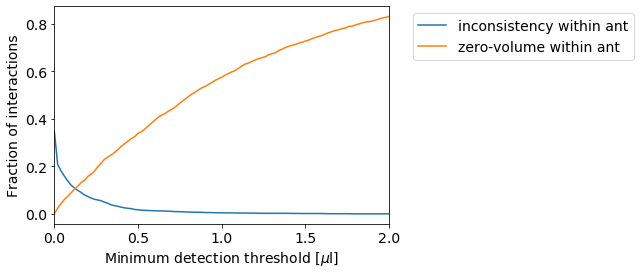

In [106]:
plt.rcParams.update({'font.size': 14})
within_ant_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')

Text(0.5, 1.0, 'old data')

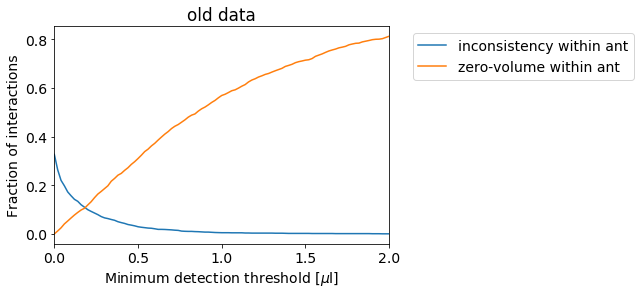

In [69]:
plt.rcParams.update({'font.size': 14})
within_ant_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')
plt.title('old data')

Text(0, 0.5, 'Fraction of interactions')

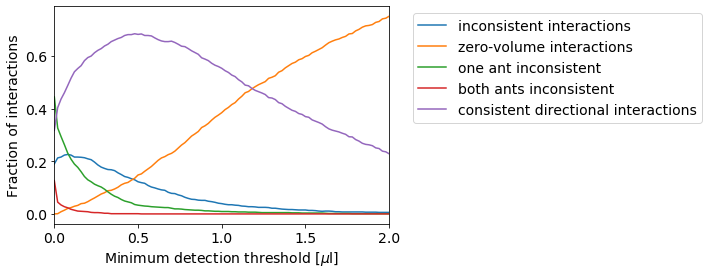

In [107]:
plt.rcParams.update({'font.size': 14})
interaction_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')


Text(0.5, 1.0, 'old data')

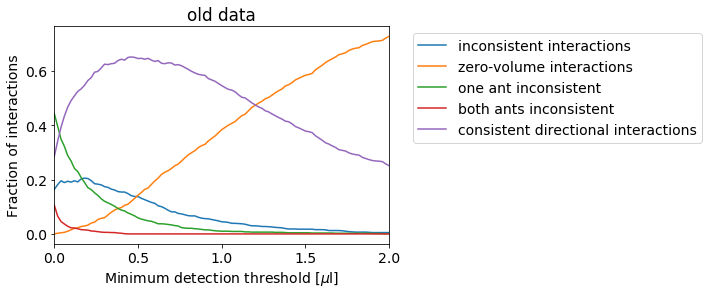

In [70]:
plt.rcParams.update({'font.size': 14})
interaction_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')
plt.title('old data')

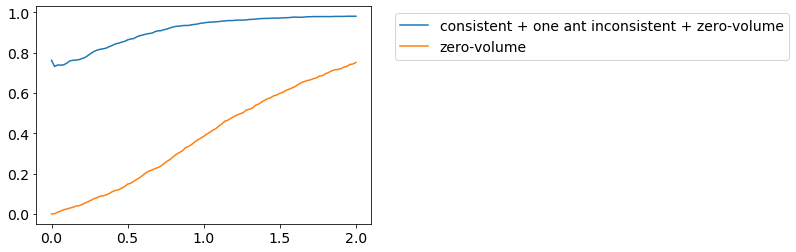

In [112]:
plt.plot(interaction_stats_df['minimum threshold'], interaction_stats_df['consistent directional interactions']+
        interaction_stats_df['one ant inconsistent']+interaction_stats_df['zero-volume interactions'])
plt.plot(interaction_stats_df['minimum threshold'],interaction_stats_df['zero-volume interactions'])
plt.legend(['consistent + one ant inconsistent + zero-volume','zero-volume'],bbox_to_anchor=[1.05,1])

Text(0.5, 1.0, 'old data')

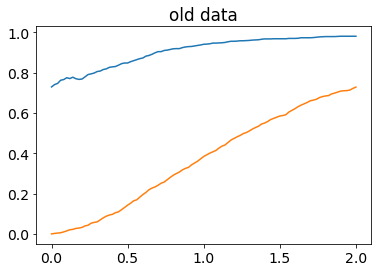

In [72]:
plt.plot(interaction_stats_df['minimum threshold'], interaction_stats_df['consistent directional interactions']+
        interaction_stats_df['one ant inconsistent']+interaction_stats_df['zero-volume interactions'])
plt.plot(interaction_stats_df['minimum threshold'],interaction_stats_df['zero-volume interactions'])
plt.title('old data')

Text(0, 0.5, 'consistent + one ant inconsistent + zero-volume')

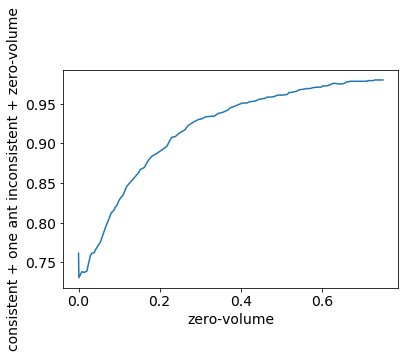

In [113]:
plt.plot(interaction_stats_df['zero-volume interactions'], interaction_stats_df['consistent directional interactions']+
        interaction_stats_df['one ant inconsistent']+interaction_stats_df['zero-volume interactions'])
plt.xlabel('zero-volume')
plt.ylabel('consistent + one ant inconsistent + zero-volume')